#PyCaret Time Series Forecasting

In [1]:
!pip install pycaret[mlops]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 719.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.5 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [2]:
import pycaret
pycaret.__version__

'3.3.2'

,3M Libor_T-1,EM Bond_T-1,US Bond ETF_T-1,Wheat 1_T-1,Wheat 2_T-1,Crude Palm Oil_T-1,Brent 1_T-1,Brent 2_T-1,Light Crude_T-1,White Sugar_T-1,...,MSCI EM_T-22,Shanghai Index_T-22,Nikkei Ind_T-22,MSCI APAC ex J_T-22,EMEquity ETF_T-22,Silver_T-22,Platinum_T-22,Palladium_T-22,Gold_T-22,Gold_T+22
0,0.000000,0.000879,0.001050,0.013158,0.013562,0.003163,-0.007879,-0.004945,-0.003486,-0.024706,...,-0.009862,0.073090,-0.028816,-0.001613,-0.012274,-0.025210,0.024300,0.082695,0.053534,0.004648
1,-0.004587,0.004096,0.002383,0.043599,0.041035,0.040991,0.042356,0.039759,0.029667,0.047906,...,0.006801,0.099088,-0.043704,0.007670,0.018151,0.060624,0.068595,0.151468,0.085822,-0.002105
2,-0.003465,-0.002040,0.000856,0.020444,0.017995,0.003462,0.006222,0.006541,0.007172,0.005262,...,0.014873,0.102887,-0.051438,0.007525,0.028712,0.056289,0.083520,0.134763,0.083915,-0.037438
3,-0.004624,0.000584,-0.002090,-0.015679,-0.012626,0.021992,0.003029,0.004249,0.002498,0.020775,...,0.004931,0.087208,-0.054678,0.005445,0.001445,0.041620,0.061601,0.109940,0.076738,-0.028097
4,-0.009292,-0.000486,0.001047,-0.003540,-0.002558,-0.012658,-0.024912,-0.022026,-0.023551,-0.025000,...,-0.003838,0.076564,-0.076171,-0.009558,-0.003904,0.058352,0.069414,0.094311,0.084487,-0.045466


<Axes: >

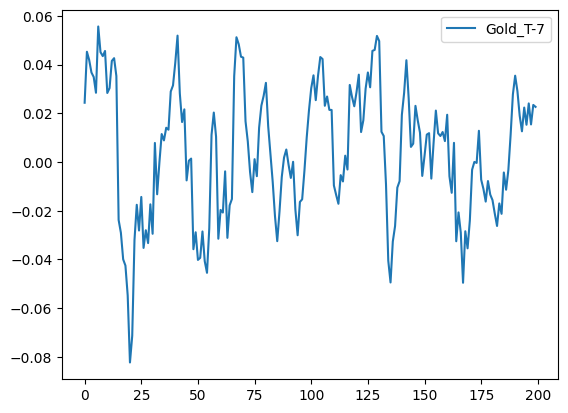

In [3]:
from pycaret.datasets import get_data
data = get_data('gold')
data = data.iloc[:200]
len(data)
data[['Gold_T-7']].plot()

In [4]:
print(', '.join(data.columns))

3M Libor_T-1, EM Bond_T-1, US Bond ETF_T-1, Wheat 1_T-1, Wheat 2_T-1, Crude Palm Oil_T-1, Brent 1_T-1, Brent 2_T-1, Light Crude_T-1, White Sugar_T-1, Corn_T-1, Corn_T-1.1, Euro Curr_T-1, AUD_T-1, INR_T-1, MR_T-1, Yuan_T-1, Dollex_T-1, S&P 500_T-1, DJ Index_T-1, Nifty_T-1, MSCI EM_T-1, Shanghai Index_T-1, Nikkei Ind_T-1, MSCI APAC ex J_T-1, EMEquity ETF_T-1, Silver_T-1, Platinum_T-1, Palladium_T-1, Gold_T-1, 3M Libor_T-7, EM Bond_T-7, US Bond ETF_T-7, Wheat 1_T-7, Wheat 2_T-7, Crude Palm Oil_T-7, Brent 1_T-7, Brent 2_T-7, Light Crude_T-7, White Sugar_T-7, Corn_T-7, Corn_T-7.1, Euro Curr_T-7, AUD_T-7, INR_T-7, MR_T-7, Yuan_T-7, Dollex_T-7, S&P 500_T-7, DJ Index_T-7, Nifty_T-7, MSCI EM_T-7, Shanghai Index_T-7, Nikkei Ind_T-7, MSCI APAC ex J_T-7, EMEquity ETF_T-7, Silver_T-7, Platinum_T-7, Palladium_T-7, Gold_T-7, 3M Libor_T-14, EM Bond_T-14, US Bond ETF_T-14, Wheat 1_T-14, Wheat 2_T-14, Crude Palm Oil_T-14, Brent 1_T-14, Brent 2_T-14, Light Crude_T-14, White Sugar_T-14, Corn_T-14, Corn_T-

In [5]:
from pycaret.time_series import *
s = setup(data, target='Gold_T-7', fh = 10, session_id = 123)  # Forecasting horizon of 10 days

,Description,Value
0,session_id,123
1,Target,Gold_T-7
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(200, 121)"
5,Transformed data shape,"(200, 121)"
6,Transformed train set shape,"(190, 121)"
7,Transformed test set shape,"(10, 121)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [6]:
from pycaret.time_series import TSForecastingExperiment
exp = TSForecastingExperiment()

In [7]:
type(exp)

pycaret.time_series.forecasting.oop.TSForecastingExperiment

In [9]:
exp.setup(data, target='Gold_T-7', fh = 10, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Gold_T-7
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(200, 121)"
5,Transformed data shape,"(200, 121)"
6,Transformed train set shape,"(190, 121)"
7,Transformed test set shape,"(10, 121)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


## Check Stats

In [8]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,200.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,0.003899
3,Summary,Statistics,Transformed,Median,,0.007677
4,Summary,Statistics,Transformed,Standard Deviation,,0.02703
5,Summary,Statistics,Transformed,Variance,,0.000731
6,Summary,Statistics,Transformed,Kurtosis,,-0.405052
7,Summary,Statistics,Transformed,Skewness,,-0.29206
8,Summary,Statistics,Transformed,# Distinct Values,,200.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",459.373412


## Compare Models

In [10]:
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.5200,0.4684,0.0091,0.0104,5.5706,0.8776,0.5372,1.5533
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.5407,0.4962,0.0095,0.0111,19.9636,0.7154,-0.7525,1.0233
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.5463,0.5032,0.0096,0.0112,7.6130,1.0298,0.4702,2.3267
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.5890,0.5357,0.0103,0.0119,18.1145,0.8155,-0.7076,1.1067
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.5910,0.5448,0.0103,0.0121,9.1528,0.9739,0.3505,1.8767
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.6007,0.5436,0.0105,0.0121,5.2075,1.0791,0.3794,1.7067
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.6308,0.5881,0.0110,0.0131,7.4082,1.0670,0.2440,1.3700
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.6394,0.5737,0.0112,0.0128,8.3392,1.1482,0.3087,2.1667
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.6776,0.6142,0.0119,0.0137,12.1702,1.1354,0.1002,2.0833
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,0.8659,0.8248,0.0152,0.0184,6.6688,1.2268,-1.2857,1.5133


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [11]:
exp.compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.5200,0.4684,0.0091,0.0104,5.5706,0.8776,0.5372,1.3700
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.5407,0.4962,0.0095,0.0111,19.9636,0.7154,-0.7525,1.3167
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.5463,0.5032,0.0096,0.0112,7.6130,1.0298,0.4702,2.2100
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.5890,0.5357,0.0103,0.0119,18.1145,0.8155,-0.7076,1.0867
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.5910,0.5448,0.0103,0.0121,9.1528,0.9739,0.3505,2.0133
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.6007,0.5436,0.0105,0.0121,5.2075,1.0791,0.3794,1.7533
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.6308,0.5881,0.0110,0.0131,7.4082,1.0670,0.2440,1.0733
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.6394,0.5737,0.0112,0.0128,8.3392,1.1482,0.3087,2.6400
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.6776,0.6142,0.0119,0.0137,12.1702,1.1354,0.1002,1.7700
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,0.8659,0.8248,0.0152,0.0184,6.6688,1.2268,-1.2857,1.6833


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [2, 1]},
                                                   n_jobs=1)],
                    regressor=LGBMRegressor(n_jobs=-1, random_state=123), sp=2,
                    window_length=2)

In [12]:
plot_model(best, plot = 'forecast')

## Prediction

In [14]:
pred_obj = predict_model(best)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,LGBMRegressor,1.7635,1.6552,0.0299,0.0359,1.5333,1.4392,-29.4079


In [15]:
pred_obj.head()

,y_pred
190,0.0352
191,0.0252
192,0.0242
193,-0.0048
194,-0.0166


In [16]:
save_model(best, 'my_gold_pipeline')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [2,
                                                                                                                                         1]},
                                                                                                                    n_jobs=1)],
                                                                                     regressor=LGBMRegressor(n_jobs=-1, random_state=123),
                                                                                     sp=2,
                                                                                     window_length=2))]))]),
 'my_gold_pipeline.pkl')

In [17]:
loaded_best_pipeline = load_model('my_gold_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [2,
                                                                                                                                        1]},
                                                                                                                   n_jobs=1)],
                                                                                    regressor=LGBMRegressor(n_jobs=-1, random_state=123),
                                                                                    sp=2,
                                                                                    window_length=2))]))])

# Detailed function-by-function overview

In [20]:
s = setup(data, target='Gold_T-7', fh = 10, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Gold_T-7
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(200, 121)"
5,Transformed data shape,"(200, 121)"
6,Transformed train set shape,"(190, 121)"
7,Transformed test set shape,"(10, 121)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [21]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'all_sps_to_use',
 'approach_type',
 'candidate_sps',
 'data',
 'dataset',
 'dataset_transformed',
 'enforce_exogenous',
 'enforce_pi',
 'exogenous_present',
 'exp_id',
 'exp_name_log',
 'fh',
 'fold_generator',
 'fold_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'index_type',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'model_engines',
 'n_jobs_param',
 'pipeline',
 'primary_sp_to_use',
 'seasonality_present',
 'seed',
 'significant_sps',
 'significant_sps_no_harmonics',
 'strictly_positive',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [22]:
# lets access y_train_transformed
get_config('y_train_transformed')

,Gold_T-7
0,0.024355
1,0.045298
2,0.041931
3,0.036787
4,0.034929
...,...
185,-0.004302
186,-0.011386
187,-0.003281
188,0.011210


In [23]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


In [24]:
# init setup fold_strategy = expanding
s = setup(data, target='Gold_T-7', fh = 10, session_id = 123,
          fold_strategy = 'expanding', numeric_imputation_target = 'drift')

,Description,Value
0,session_id,123
1,Target,Gold_T-7
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(200, 121)"
5,Transformed data shape,"(200, 121)"
6,Transformed train set shape,"(190, 121)"
7,Transformed test set shape,"(10, 121)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


## Compare Models

In [25]:
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.5200,0.4684,0.0091,0.0104,5.5706,0.8776,0.5372,2.3367
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.5407,0.4962,0.0095,0.0111,19.9636,0.7154,-0.7525,1.0967
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.5463,0.5032,0.0096,0.0112,7.6130,1.0298,0.4702,2.9033
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.5890,0.5357,0.0103,0.0119,18.1145,0.8155,-0.7076,1.7567
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.5910,0.5448,0.0103,0.0121,9.1528,0.9739,0.3505,2.3933
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.6007,0.5436,0.0105,0.0121,5.2075,1.0791,0.3794,2.6500
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.6308,0.5881,0.0110,0.0131,7.4082,1.0670,0.2440,1.2567
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.6394,0.5737,0.0112,0.0128,8.3392,1.1482,0.3087,1.7800
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.6776,0.6142,0.0119,0.0137,12.1702,1.1354,0.1002,1.4400
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,0.8659,0.8248,0.0152,0.0184,6.6688,1.2268,-1.2857,1.1467


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [26]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
croston,Croston,sktime.forecasting.croston.Croston,True
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsD...,True
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsD...,True
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsD...,True
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsD...,True
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,pycaret.containers.models.time_series.BaseCdsD...,True
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,pycaret.containers.models.time_series.BaseCdsD...,True


In [28]:
compare_ts_models = compare_models(include = ['arima', 'auto_arima', 'croston', 'lr_cds_dt', 'en_cds_dt', 'ridge_cds_dt', 'lasso_cds_dt', 'llar_cds_dt', 'br_cds_dt', 'huber_cds_dt'])

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.5407,0.4962,0.0095,0.0111,19.9636,0.7154,-0.7525,1.2133
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.5890,0.5357,0.0103,0.0119,18.1145,0.8155,-0.7076,1.8900
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.8885,0.7907,0.0156,0.0177,8.5397,1.4968,-0.5236,1.5667
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,1.1743,1.0420,0.0206,0.0233,5.3315,1.8303,-1.3562,1.1833
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,1.1743,1.0420,0.0206,0.0233,5.3315,1.8303,-1.3562,1.4033
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,1.1743,1.0420,0.0206,0.0233,5.3315,1.8303,-1.3562,1.1733
croston,Croston,1.3454,1.1794,0.0236,0.0263,11.2995,1.7614,-2.2431,0.2267
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,1.4066,1.2578,0.0247,0.0281,30.9209,1.0826,-5.6960,1.2967
auto_arima,Auto ARIMA,1.4602,1.3060,0.0256,0.0292,35.6508,1.1234,-6.7242,152.1233
arima,ARIMA,1.7765,1.6238,0.0312,0.0363,52.7884,1.1755,-10.2636,7.1167


Processing:   0%|          | 0/45 [00:00<?, ?it/s]

In [29]:
compare_ts_models

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [2, 1]},
                                                   n_jobs=1)],
                    regressor=BayesianRidge(), sp=2, window_length=2)

In [30]:
compare_ts_models_results = pull()
compare_ts_models_results

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,0.5407,0.4962,0.0095,0.0111,19.9636,0.7154,-0.7525,1.2133
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.5890,0.5357,0.0103,0.0119,18.1145,0.8155,-0.7076,1.8900
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.8885,0.7907,0.0156,0.0177,8.5397,1.4968,-0.5236,1.5667
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,1.1743,1.0420,0.0206,0.0233,5.3315,1.8303,-1.3562,1.1833
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,1.1743,1.0420,0.0206,0.0233,5.3315,1.8303,-1.3562,1.4033
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,1.1743,1.0420,0.0206,0.0233,5.3315,1.8303,-1.3562,1.1733
croston,Croston,1.3454,1.1794,0.0236,0.0263,11.2995,1.7614,-2.2431,0.2267
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,1.4066,1.2578,0.0247,0.0281,30.9209,1.0826,-5.6960,1.2967
auto_arima,Auto ARIMA,1.4602,1.3060,0.0256,0.0292,35.6508,1.1234,-6.7242,152.1233
arima,ARIMA,1.7765,1.6238,0.0312,0.0363,52.7884,1.1755,-10.2636,7.1167


In [31]:
best_mae_models_top3 = compare_models(sort = 'R2', n_select = 3)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.5200,0.4684,0.0091,0.0104,5.5706,0.8776,0.5372,2.6067
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.5463,0.5032,0.0096,0.0112,7.6130,1.0298,0.4702,3.2567
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.6007,0.5436,0.0105,0.0121,5.2075,1.0791,0.3794,2.5400
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.5910,0.5448,0.0103,0.0121,9.1528,0.9739,0.3505,2.2267
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.6394,0.5737,0.0112,0.0128,8.3392,1.1482,0.3087,1.8300
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.6308,0.5881,0.0110,0.0131,7.4082,1.0670,0.2440,1.5200
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.6776,0.6142,0.0119,0.0137,12.1702,1.1354,0.1002,1.5133
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.8885,0.7907,0.0156,0.0177,8.5397,1.4968,-0.5236,1.1000
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.5890,0.5357,0.0103,0.0119,18.1145,0.8155,-0.7076,1.3933
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.5407,0.4962,0.0095,0.0111,19.9636,0.7154,-0.7525,1.1333


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

In [32]:
# list of top 3 models by MAE
best_mae_models_top3

[BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [2, 1]},
                                                    n_jobs=1)],
                     regressor=LGBMRegressor(n_jobs=-1, random_state=123), sp=2,
                     window_length=2),
 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [2, 1]},
                                                    n_jobs=1)],
                     regressor=RandomForestRegressor(n_jobs=-1, random_state=123),
                     sp=2, window_length=2),
 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [2, 1]},
                                                    n_jobs=1)],
                     regressor=GradientBoostingRegressor(random_state=123), sp=2,
                     window_length=2)]

## Check Stats

In [33]:
# check stats on original data
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,200.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,0.003899
3,Summary,Statistics,Transformed,Median,,0.007677
4,Summary,Statistics,Transformed,Standard Deviation,,0.02703
5,Summary,Statistics,Transformed,Variance,,0.000731
6,Summary,Statistics,Transformed,Kurtosis,,-0.405052
7,Summary,Statistics,Transformed,Skewness,,-0.29206
8,Summary,Statistics,Transformed,# Distinct Values,,200.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",459.373412


In [34]:
# check_stats on residuals of best model
check_stats(estimator = best)

In sample predictions has not been implemented for this estimator of type 'BaseCdsDtForecaster' in `sktime`. When this is implemented, it will be enabled by default in pycaret.
In sample predictions has not been implemented for this estimator of type 'BaseCdsDtForecaster' in `sktime`. When this is implemented, it will be enabled by default in pycaret.


## Create Model

In [35]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
croston,Croston,sktime.forecasting.croston.Croston,True
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsD...,True
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsD...,True
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsD...,True
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsD...,True
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,pycaret.containers.models.time_series.BaseCdsD...,True
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,pycaret.containers.models.time_series.BaseCdsD...,True


In [37]:
arima = create_model('arima')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,1.8183,1.8744,0.0321,0.0422,1.3171,0.9125,-3.4587
1,169.0000,2.8001,2.3082,0.0492,0.0516,156.1232,1.5074,-27.4188
2,179.0000,0.7112,0.6889,0.0123,0.0152,0.9250,1.1068,0.0866
Mean,nan,1.7765,1.6238,0.0312,0.0363,52.7884,1.1755,-10.2636
SD,nan,0.8533,0.6844,0.0151,0.0154,73.0689,0.2477,12.2166


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [38]:
arima_results = pull()
print(type(arima_results))
arima_results

<class 'pandas.core.frame.DataFrame'>


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0,1.8183,1.8744,0.0321,0.0422,1.3171,0.9125,-3.4587
1,169.0,2.8001,2.3082,0.0492,0.0516,156.1232,1.5074,-27.4188
2,179.0,0.7112,0.6889,0.0123,0.0152,0.9250,1.1068,0.0866
Mean,NaN,1.7765,1.6238,0.0312,0.0363,52.7884,1.1755,-10.2636
SD,NaN,0.8533,0.6844,0.0151,0.0154,73.0689,0.2477,12.2166


In [39]:
# train croston model with fold=5
croston = create_model('croston', fold=5)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,139.0000,0.6451,0.6348,0.0116,0.0146,1.3073,0.6347,-0.3176
1,149.0000,0.4663,0.4454,0.0085,0.0103,1.3645,0.6888,-1.2074
2,159.0000,1.8498,1.6494,0.0327,0.0371,1.4575,1.6888,-2.4525
3,169.0000,1.0430,0.9127,0.0183,0.0204,30.9604,1.8148,-3.4427
4,179.0000,1.1434,0.9761,0.0198,0.0215,1.4805,1.7806,-0.8340
Mean,nan,1.0295,0.9237,0.0182,0.0208,7.3140,1.3215,-1.6508
SD,nan,0.4798,0.4103,0.0084,0.0091,11.8233,0.5405,1.1397


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Tune Model

In [48]:
# train a dt model with default params
dt = create_model('lightgbm_cds_dt')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.6622,0.6229,0.0117,0.0140,0.4774,0.7009,0.5077
1,169.0000,0.3113,0.2721,0.0055,0.0061,15.3785,0.8214,0.6050
2,179.0000,0.5867,0.5102,0.0101,0.0112,0.8558,1.1104,0.4989
Mean,nan,0.5200,0.4684,0.0091,0.0104,5.5706,0.8776,0.5372
SD,nan,0.1508,0.1462,0.0026,0.0033,6.9370,0.1718,0.0481


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [49]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,1.7833,1.5939,0.0315,0.0359,1.3760,1.6847,-2.2241
1,169.0000,0.7455,0.6744,0.0131,0.0151,12.6208,1.8832,-1.4262
2,179.0000,0.9925,0.8577,0.0172,0.0189,1.1386,1.9185,-0.4160
Mean,nan,1.1738,1.0420,0.0206,0.0233,5.0452,1.8288,-1.3554
SD,nan,0.4426,0.3974,0.0079,0.0091,5.3577,0.1029,0.7399


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   48.0s finished


In [50]:
dt

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [2, 1]},
                                                   n_jobs=1)],
                    regressor=LGBMRegressor(n_jobs=-1, random_state=123), sp=2,
                    window_length=2)

In [51]:
# define tuning grid
dt_grid = {
    'regressor__max_depth': [None, 2, 4, 6, 8, 10]
}

# tune model with custom grid and metric = MAE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.6441,0.5840,0.0114,0.0132,0.5552,0.7027,0.5672
1,169.0000,0.3035,0.2831,0.0053,0.0063,8.7459,0.8617,0.5724
2,179.0000,0.5501,0.4831,0.0095,0.0106,0.7739,1.0876,0.5507
Mean,nan,0.4992,0.4501,0.0087,0.0100,3.3583,0.8840,0.5634
SD,nan,0.1436,0.1250,0.0025,0.0028,3.8107,0.1579,0.0092


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   36.4s finished


In [52]:
# see tuned_dt params
tuned_dt

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [2, 1]},
                                                   n_jobs=1)],
                    regressor=LGBMRegressor(max_depth=2, n_jobs=-1, random_state=123),
                    sp=2, window_length=2)

In [53]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,1.7833,1.5939,0.0315,0.0359,1.3760,1.6847,-2.2241
1,169.0000,0.7455,0.6744,0.0131,0.0151,12.6208,1.8832,-1.4262
2,179.0000,0.9925,0.8577,0.0172,0.0189,1.1386,1.9185,-0.4160
Mean,nan,1.1738,1.0420,0.0206,0.0233,5.0452,1.8288,-1.3554
SD,nan,0.4426,0.3974,0.0079,0.0091,5.3577,0.1029,0.7399


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   50.3s finished


In [54]:
# model object
tuned_dt

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [2, 1]},
                                                   n_jobs=1)],
                    regressor=LGBMRegressor(n_jobs=-1, random_state=123), sp=2,
                    window_length=2)

In [55]:
# tuner object
tuner

## ✅ Blend Models

In [56]:
# top 3 models based on mae
best_mae_models_top3

[BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [2, 1]},
                                                    n_jobs=1)],
                     regressor=LGBMRegressor(n_jobs=-1, random_state=123), sp=2,
                     window_length=2),
 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [2, 1]},
                                                    n_jobs=1)],
                     regressor=RandomForestRegressor(n_jobs=-1, random_state=123),
                     sp=2, window_length=2),
 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [2, 1]},
                                                    n_jobs=1)],
                     regressor=GradientBoostingRegressor(random_state=123), sp=2,
                     window_length=2)]

In [57]:
# blend top 3 models
blend_models(best_mae_models_top3)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,159.0000,0.7742,0.6964,0.0137,0.0157,0.6136,0.9580,0.3845
1,169.0000,0.3126,0.2656,0.0055,0.0059,16.9828,0.8664,0.6238
2,179.0000,0.5692,0.5036,0.0098,0.0111,0.7802,1.1251,0.5119
Mean,nan,0.5520,0.4885,0.0097,0.0109,6.1255,0.9831,0.5068
SD,nan,0.1888,0.1762,0.0033,0.0040,7.6776,0.1071,0.0978


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

EnsembleForecaster(forecasters=[('LGBMRegressor',
                                 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [2,
                                                                                                         1]},
                                                                                    n_jobs=1)],
                                                     regressor=LGBMRegressor(n_jobs=-1, random_state=123),
                                                     sp=2, window_length=2)),
                                ('RandomForestRegressor',
                                 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [2,
                                                                                                         1]},
                                                                                    n_jobs=1)],
                                                     regressor=RandomForestRegressor(n_jobs=-1, random_state=123),
                                                     sp=2, window_length=2)),
                                ('GradientBoostingRegressor',
                                 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [2,
                                                                                                         1]},
                                                                                    n_jobs=1)],
                                                     regressor=GradientBoostingRegressor(random_state=123),
                                                     sp=2, window_length=2))],
                   n_jobs=-1)

## ✅ Plot Model

In [58]:
# plot forecast
plot_model(best, plot = 'forecast')

In [59]:
# plot acf
plot_model(plot = 'acf')

In [60]:
# plot diagnostics
plot_model(plot = 'diagnostics')

## Finalize Model

In [61]:
final_best = finalize_model(best)

In [62]:
final_best

ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('transformer_target',
                                                                TransformerPipeline(steps=[('numerical_imputer',
                                                                                            Imputer(random_state=123))])),
                                                               ('model',
                                                                BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [2,
                                                                                                                                        1]},
                                                                                                                   n_jobs=1)],
                                                                                    regressor=LGBMRegressor(n_jobs=-1, random_state=123),
                                                                                    sp=2,
                                                                                    window_length=2))]))])